In [1]:
import os

dataset_path = "/home/joey/CIDAUT/"

# current_file_path = os.getcwd()
# working_directory = current_file_path.split("/")[-1]
# print(f"Current file path: {working_directory}")

def list_files(directory):
    for dirname, _, filenames in os.walk(directory):
        print(f"Directory: {dirname}")
        for filename in filenames:
            print(f"  - {filename}")

print("Listing all files and directories in the working directory:")
list_files(dataset_path)

kaggle_train_data = os.path.join(dataset_path, "Train")
kaggle_test_data = os.path.join(dataset_path, "Test")

if os.path.exists(kaggle_train_data):
    print(f"\nFiles in the {kaggle_train_data} directory:")
    list_files(kaggle_train_data)
else:
    print(f"\n{kaggle_train_data} directory does not exist.")

if os.path.exists(kaggle_test_data):
    print(f"\nFiles in the {kaggle_test_data} directory:")
    list_files(kaggle_test_data)
else:
    print(f"\n{kaggle_test_data} directory does not exist.")

train_directory = os.path.join(dataset_path, "Train_CNN")

# Train_dataset split from the Kaggle dataset into Fake and Real directories
train_fake_directory = os.path.join(dataset_path, "Train_dataset", "Fake")
train_real_directory = os.path.join(dataset_path, "Train_dataset", "Real")

if os.path.exists(train_fake_directory):
    print("\nFiles in the 'Train/Fake' directory:")
    list_files(train_fake_directory)
else:
    print("\n'Train/Fake' directory does not exist.")

if os.path.exists(train_real_directory):
    print("\nFiles in the 'Train/Real' directory:")
    list_files(train_real_directory)
else:
    print("\n'Train/Real' directory does not exist.")


Listing all files and directories in the working directory:
Directory: /home/joey/CIDAUT/
  - Train.dvc
  - MNASNet_pred.csv
  - Train_dataset.dvc
  - first_submission_ty.csv
  - test_images_blur_scores.csv
  - EfficientNetB0_pred.csv
  - .gitignore
  - Train_CNN.dvc
  - sample_submission.csv
  - README.md
  - Val_CNN.dvc
  - .dvcignore
  - requirements.txt
Directory: /home/joey/CIDAUT/.dvc
  - .gitignore
  - config
Directory: /home/joey/CIDAUT/.dvc/cache
Directory: /home/joey/CIDAUT/.dvc/cache/files
Directory: /home/joey/CIDAUT/.dvc/cache/files/md5
Directory: /home/joey/CIDAUT/.dvc/cache/files/md5/af
  - e2c027adaad8160c335976109f21c1
  - 83d174090c48fb63e30c7c85a52245
  - de7919d544d6b77d48e75d3e91e256.dir
  - afdf6f9694af52617d7533eff07d30
  - e1c1aac088a667d612371634ddbe7e
Directory: /home/joey/CIDAUT/.dvc/cache/files/md5/dc
  - 07b8756131d373f9f0ed489972f303
Directory: /home/joey/CIDAUT/.dvc/cache/files/md5/87
  - bb9598ca3afbf45eb557f0d0cefaca
Directory: /home/joey/CIDAUT/.dvc/ca

In [2]:
import glob

n_real = len(glob.glob(os.path.join(train_real_directory,"*")))
n_fake = len(glob.glob(os.path.join(train_fake_directory, '*')))

print(f"Number of real images: {n_real}")
print(f"Number of fake images: {n_fake}")

Number of real images: 404
Number of fake images: 316


In [3]:
import pandas as pd
train_csv = pd.read_csv(os.path.join(dataset_path, 'dataset_code_and_files/train.csv'))
train_csv.head()
train_csv.groupby(['label']).size()/len(train_csv)*100

label
editada    43.75
real       56.25
dtype: float64

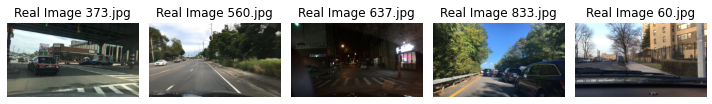

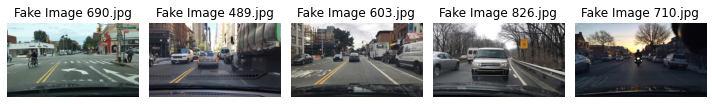

In [4]:
import os
from matplotlib import pyplot as plt
from PIL import Image

# append real and fake image paths to a list

image_paths = []

for dirname, _, filenames in os.walk(train_real_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(train_fake_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_paths.append(os.path.join(dirname, filename))

fig, axes = plt.subplots(1, 5, figsize=(10, 5))

### show real images from dataset

for i, path in enumerate(image_paths[:5]):
    image = Image.open(path)
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(f"Real Image {path.split('/')[-1]}")

plt.tight_layout()
plt.show()

### show fake images from dataset

fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i, path in enumerate(image_paths[-5:]):
    image = Image.open(path)
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(f"Fake Image {path.split('/')[-1]}")

plt.tight_layout()
plt.show()

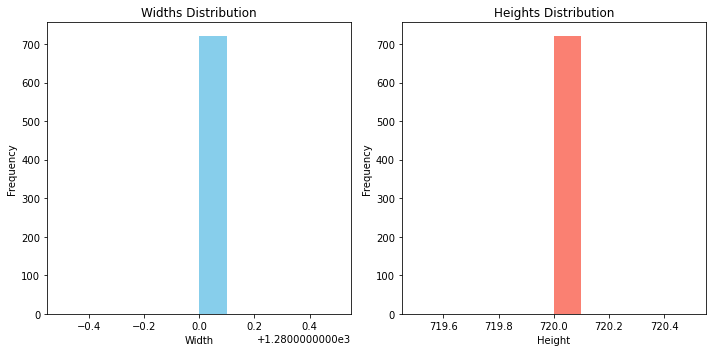

In [5]:
### get images dimensions

image_dimensions = [Image.open(path).size for path in image_paths]

widths, heights = zip(*image_dimensions)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(widths, bins=10, color="skyblue")  
ax[0].set_title("Widths Distribution")
ax[0].set_xlabel("Width")
ax[0].set_ylabel("Frequency")

ax[1].hist(heights, bins=10, color="salmon")
ax[1].set_title("Heights Distribution")
ax[1].set_xlabel("Height")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

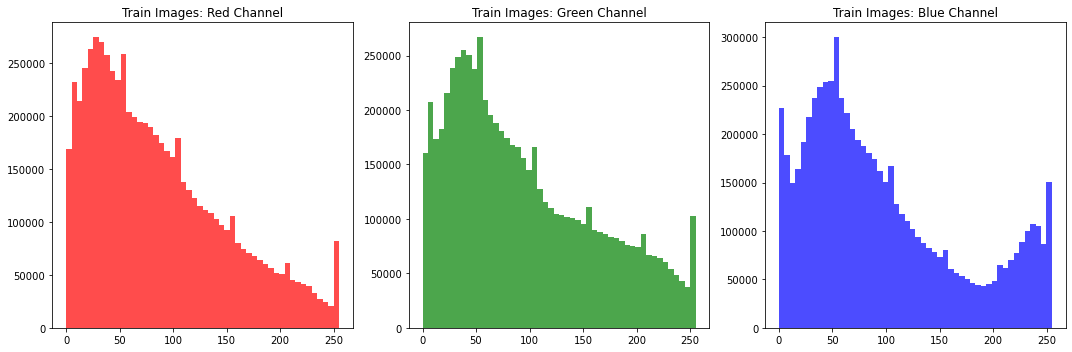

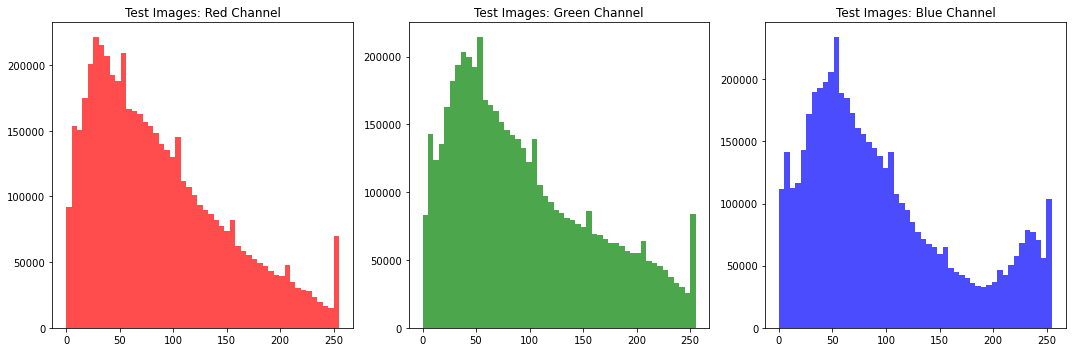

In [6]:
### see RGB distribution of train and test images

import numpy as np

train_real_image_paths = []
train_fake_image_paths = []

for dirname, _, filenames in os.walk(train_real_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_real_image_paths.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(train_fake_directory):
    for filename in filenames:
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            train_fake_image_paths.append(os.path.join(dirname, filename))

def get_rgb_distribution(image_paths, resize_to = (128,128)):
    reds = []
    greens = []
    blues = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")
        image = image.resize(resize_to)
        image_array = np.array(image)
        reds.extend(image_array[:, :, 0].flatten())
        greens.extend(image_array[:, :, 1].flatten())
        blues.extend(image_array[:, :, 2].flatten())
    return reds, greens, blues

train_reds, train_greens, train_blues = get_rgb_distribution(train_real_image_paths)
test_reds, test_greens, test_blues = get_rgb_distribution(train_fake_image_paths)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(train_reds, bins=50, color='red', alpha=0.7)
axes[0].set_title('Train Images: Red Channel')
axes[1].hist(train_greens, bins=50, color='green', alpha=0.7)
axes[1].set_title('Train Images: Green Channel')
axes[2].hist(train_blues, bins=50, color='blue', alpha=0.7)
axes[2].set_title('Train Images: Blue Channel')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(test_reds, bins=50, color='red', alpha=0.7)
axes[0].set_title('Test Images: Red Channel')
axes[1].hist(test_greens, bins=50, color='green', alpha=0.7)
axes[1].set_title('Test Images: Green Channel')
axes[2].hist(test_blues, bins=50, color='blue', alpha=0.7)
axes[2].set_title('Test Images: Blue Channel')
plt.tight_layout()
plt.show()

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


def calculate_rgb_means(image_paths, resize_to=(128, 128)):
    """Calculate mean RGB intensities for each image."""
    data = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")
        image = image.resize(resize_to)
        image_array = np.array(image)
        
        # Calculate mean intensities for each channel
        mean_red = np.mean(image_array[:, :, 0])
        mean_green = np.mean(image_array[:, :, 1])
        mean_blue = np.mean(image_array[:, :, 2])
        
        data.append({
            "Image": os.path.basename(path),
            "Red Mean": mean_red,
            "Green Mean": mean_green,
            "Blue Mean": mean_blue
        })
    return pd.DataFrame(data)


# Calculate RGB means for real and fake images
real_image_data = calculate_rgb_means(train_real_image_paths)
fake_image_data = calculate_rgb_means(train_fake_image_paths)

# Combine into a single DataFrame with labels
real_image_data["Label"] = "Real"
fake_image_data["Label"] = "Fake"
all_image_data = pd.concat([real_image_data, fake_image_data], ignore_index=True)

# Save to a CSV file for further analysis
output_path = "image_rgb_means.csv"
all_image_data.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")

# Display first few rows of the DataFrame
print(all_image_data.head())


Data saved to image_rgb_means.csv
     Image    Red Mean  Green Mean  Blue Mean Label
0  373.jpg   85.810669   92.471863  86.427307  Real
1  560.jpg  101.046021  102.979065  95.521362  Real
2  637.jpg   38.591614   33.151062  28.772583  Real
3  833.jpg   75.825134   88.972290  88.197205  Real
4   60.jpg  106.230286  102.750488  99.687561  Real


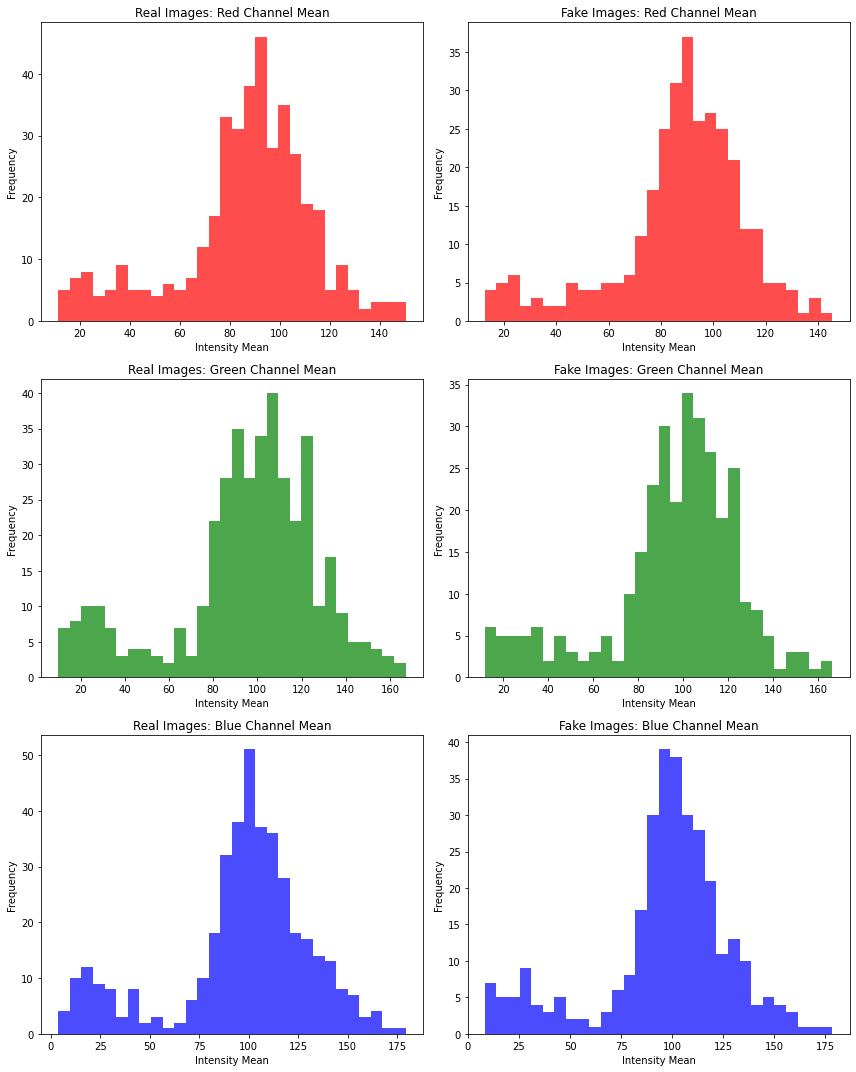

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data after execution state reset
data_path = "image_rgb_means.csv"
image_data = pd.read_csv(data_path)

# Separate real and fake image data
real_images = image_data[image_data["Label"] == "Real"]
fake_images = image_data[image_data["Label"] == "Fake"]

# Plot histograms for each RGB mean column
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
columns = ["Red Mean", "Green Mean", "Blue Mean"]
colors = ["red", "green", "blue"]
titles = ["Red Channel Mean", "Green Channel Mean", "Blue Channel Mean"]

for i, (column, color, title) in enumerate(zip(columns, colors, titles)):
    # Real images
    axes[i, 0].hist(real_images[column], bins=30, color=color, alpha=0.7)
    axes[i, 0].set_title(f"Real Images: {title}")
    axes[i, 0].set_xlabel("Intensity Mean")
    axes[i, 0].set_ylabel("Frequency")
    
    # Fake images
    axes[i, 1].hist(fake_images[column], bins=30, color=color, alpha=0.7)
    axes[i, 1].set_title(f"Fake Images: {title}")
    axes[i, 1].set_xlabel("Intensity Mean")
    axes[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Real Image ELA Statistics:
Mean: 0.0575101263821125
Variance: 0.08442045748233795
Standard Deviation: 0.2905519902706146

Fake Image ELA Statistics:
Mean: 0.1102701798081398
Variance: 0.19118204712867737
Standard Deviation: 0.4372437000274658


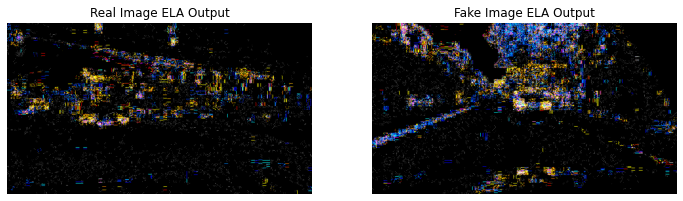

In [9]:
import cv2
import numpy as np
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

def calculate_ela_statistics(image_path):
    """
    Perform ELA analysis and calculate statistical properties of the ELA output.
    """
    # Open the original image and save it with reduced quality
    original = Image.open(image_path).convert("RGB")
    temp_path = "temp_ela_image.jpg"
    original.save(temp_path, "JPEG", quality=95)  # Lower quality for ELA

    # Open the recompressed image and compute ELA
    recompressed = Image.open(temp_path)
    ela_image = ImageChops.difference(original, recompressed)
    ela_array = np.asarray(ela_image, dtype=np.float32)

    # Calculate statistics
    mean = np.mean(ela_array)
    variance = np.var(ela_array)
    std_dev = np.std(ela_array)
    return mean, variance, std_dev, ela_array

# Example: Analyze a real image
real_image_path = train_real_image_paths[0]  
real_mean, real_var, real_std, real_ela_array = calculate_ela_statistics(real_image_path)

# Example: Analyze a fake image
fake_image_path = train_fake_image_paths[0]  
fake_mean, fake_var, fake_std, fake_ela_array = calculate_ela_statistics(fake_image_path)

# Print statistics
print(f"Real Image ELA Statistics:\nMean: {real_mean}\nVariance: {real_var}\nStandard Deviation: {real_std}")
print()
print(f"Fake Image ELA Statistics:\nMean: {fake_mean}\nVariance: {fake_var}\nStandard Deviation: {fake_std}")

# Visualize ELA outputs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# axes[0].imshow(real_ela_array / 255.0, cmap="gray")
axes[0].imshow(real_ela_array)
axes[0].set_title("Real Image ELA Output")
# axes[1].imshow(fake_ela_array / 255.0, cmap="gray")
axes[1].imshow(fake_ela_array)
axes[1].set_title("Fake Image ELA Output")
for ax in axes:
    ax.axis("off")
plt.show()


# Feature Engineering

In [10]:
### check missing values

missing_values = train_csv.isnull().sum()

missing_values

image    0
label    0
dtype: int64

In [11]:
### data cleaning

duplicates = train_csv[train_csv.duplicated()]

duplicates


,image,label


## Calculate blurriness 

### using filter: Laplacian, Sobel and FFT
### change real and fake label to one hot encoding
### combine all columns
### concat into csv

In [2]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_blur_score(image_path):
    """
    Calculates the blurriness of an image using the variance of the Laplacian.
    A lower variance indicates higher blurriness.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None  
    laplacian = cv2.Laplacian(image, cv2.CV_64F)  # detect edges in image
    return laplacian.var()

def calculate_fft_blur_score(image_path):
    """
    Calculates the FFT blur score of an image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return np.mean(magnitude_spectrum)

def apply_sobel_filter(image_path):
    """
    Applies Sobel filter to an image to detect edges and calculates the mean gradient magnitude.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)
    return np.mean(sobel_magnitude)

def generate_blur_scores_csv(real_dir, fake_dir, output_csv_path):
    """
    Generates a CSV file containing blur scores and labels for images in the real and fake directories.

    Args:
        real_dir (str): Directory containing real images.
        fake_dir (str): Directory containing fake images.
        output_csv_path (str): Path to save the output CSV file.
    """
    data = {
        "Image Name": [],
        "Real": [],
        "Fake": [],
        "FFT Score": [],
        "Laplacian Score": [],
        "Sobel Score": []
    }

    # Process real images
    for filename in os.listdir(real_dir):
        file_path = os.path.join(real_dir, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            fft_score = calculate_fft_blur_score(file_path)
            laplacian_score = calculate_blur_score(file_path)
            sobel_score = apply_sobel_filter(file_path)
            if fft_score is not None and laplacian_score is not None and sobel_score is not None:
                data["Image Name"].append(filename)
                data["Real"].append(1)
                data["Fake"].append(0)
                data["FFT Score"].append(fft_score)
                data["Laplacian Score"].append(laplacian_score)
                data["Sobel Score"].append(sobel_score)

    # Process fake images
    for filename in os.listdir(fake_dir):
        file_path = os.path.join(fake_dir, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            fft_score = calculate_fft_blur_score(file_path)
            laplacian_score = calculate_blur_score(file_path)
            sobel_score = apply_sobel_filter(file_path)
            if fft_score is not None and laplacian_score is not None and sobel_score is not None:
                data["Image Name"].append(filename)
                data["Real"].append(0)
                data["Fake"].append(1)
                data["FFT Score"].append(fft_score)
                data["Laplacian Score"].append(laplacian_score)
                data["Sobel Score"].append(sobel_score)

    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)
    print(f"CSV file saved at: {output_csv_path}")

output_csv = "val_img_blur_scores_with_labels.csv"
dataset_path = "/home/joey/CIDAUT/"
val_real_directory = os.path.join(dataset_path, "Val_CNN", "Real")
val_fake_directory = os.path.join(dataset_path, "Val_CNN", "Fake")
generate_blur_scores_csv(val_real_directory, val_fake_directory, output_csv)


CSV file saved at: val_img_blur_scores_with_labels.csv


##### Analysis: Find out threshold

In [13]:
import pandas as pd

file_path = os.path.join(dataset_path, 'dataset_code_and_files/blur_scores_with_labels.csv')
data = pd.read_csv(file_path)

data.head()


,Image Name,Real,Fake,FFT Score,Laplacian Score,Sobel Score
0,373.jpg,1,0,7.952578,308.865270,13.248159
1,560.jpg,1,0,7.971907,222.508201,10.117425
2,637.jpg,1,0,7.108329,38.833890,3.929205
3,833.jpg,1,0,8.777817,1032.106508,21.601107
4,60.jpg,1,0,8.679581,1022.038591,19.237833


In [20]:
import pandas as pd

score_ranges = {
    "Real": data[data["Real"] == 1][["FFT Score", "Laplacian Score", "Sobel Score"]].agg(['min', 'max']).T,
    "Fake": data[data["Fake"] == 1][["FFT Score", "Laplacian Score", "Sobel Score"]].agg(['min', 'max']).T,
}

score_ranges_df = pd.concat(score_ranges, axis=1)
score_ranges_df.columns = ["Real Min", "Real Max", "Fake Min", "Fake Max"]

print("Score Ranges for Real and Fake Images:")
print(score_ranges_df)


Score Ranges for Real and Fake Images:
                  Real Min     Real Max  Fake Min    Fake Max
FFT Score         6.481776     8.954135  6.249173    8.554983
Laplacian Score  11.342700  1552.092802  6.692411  844.707881
Sobel Score       1.324732    25.377024  1.395461   23.643961


In [24]:
# Define thresholds based on observed ranges for real
thresholds = {
    "FFT Score": (6.3, 8.5),  
    "Laplacian Score": (500, 1000),  
    "Sobel Score": (1.3, 24)  
}

# Classification function
def classify_image(row, thresholds):
    scores = {
        "FFT Score": row["FFT Score"],
        "Laplacian Score": row["Laplacian Score"],
        "Sobel Score": row["Sobel Score"]
    }
    real_votes = sum(thresholds[metric][0] <= score <= thresholds[metric][1] for metric, score in scores.items())
    fake_votes = 3 - real_votes
    return "Real" if real_votes > fake_votes else "Fake"

# Add an Actual Label column based on Real and Fake columns
def actual_label(row):
    if row["Real"] == 1:
        return "Real"
    elif row["Fake"] == 1:
        return "Fake"
    else:
        return "Unknown"  # Optional, for cases where neither column is 1

accuracy = data["Correct"].mean()
print(f"Accuracy: {accuracy:.2f}")

# Apply the Actual Label function
data["Actual Label"] = data.apply(actual_label, axis=1)

# Apply the classification function to the dataset
data["Prediction"] = data.apply(classify_image, thresholds=thresholds, axis=1)

# Display the first few rows of the dataset with the new columns
data[["Image Name", "FFT Score", "Laplacian Score", "Sobel Score", "Actual Label", "Prediction"]].head()


Accuracy: 0.56


,Image Name,FFT Score,Laplacian Score,Sobel Score,Actual Label,Prediction
0,373.jpg,7.952578,308.865270,13.248159,Real,Real
1,560.jpg,7.971907,222.508201,10.117425,Real,Real
2,637.jpg,7.108329,38.833890,3.929205,Real,Real
3,833.jpg,8.777817,1032.106508,21.601107,Real,Fake
4,60.jpg,8.679581,1022.038591,19.237833,Real,Fake


In [34]:
# Define threshold based on Laplacian Score for real
laplacian_threshold = (200, 2000)

def classify_image_laplacian(row, threshold):
    laplacian_score = row["Laplacian Score"]
    return "Real" if threshold[0] <= laplacian_score <= threshold[1] else "Fake"

def actual_label(row):
    if row["Real"] == 1:
        return "Real"
    elif row["Fake"] == 1:
        return "Fake"
    else:
        return "Unknown"  

data["Actual Label"] = data.apply(actual_label, axis=1)

data["Prediction"] = data.apply(classify_image_laplacian, threshold=laplacian_threshold, axis=1)

data["Correct"] = (data["Actual Label"] == data["Prediction"])
accuracy = data["Correct"].mean()

print(f"Accuracy: {accuracy:.2f}")
data[["Image Name", "Laplacian Score", "Actual Label", "Prediction"]].head()


Accuracy: 0.72


,Image Name,Laplacian Score,Actual Label,Prediction
0,373.jpg,308.865270,Real,Real
1,560.jpg,222.508201,Real,Real
2,637.jpg,38.833890,Real,Fake
3,833.jpg,1032.106508,Real,Real
4,60.jpg,1022.038591,Real,Real
